### Exploring the data obtained from Glassdoor based on the job search for "Data Scientist" with an empty location. These results relate to 1,000 different job postings.

*Importing the cleaned salary data and required libraries for analyzing the data.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

*Adding in job titles and seniority levels to analyze the type of positions that are sought after and find a relationship with average salary level.*

In [4]:
df['job_simple'] = df['Job Title'].apply(title_simplifier)
df.job_simple.value_counts()

data scientist               576
na                            56
data engineer                 48
machine learning engineer      9
director                       9
analyst                        7
manager                        1
Name: job_simple, dtype: int64

In [5]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        640
senior     65
junior      1
Name: seniority, dtype: int64

*Viewing the number of available jobs by state.*

In [6]:
df.job_state.value_counts()

 CA    135
 VA    104
 NY     60
 MA     51
 MD     42
 TX     40
 IL     26
 PA     20
 OH     20
 AZ     19
 DC     19
 WI     15
 MI     13
 UT     12
 WA     12
 FL     11
 NJ     11
 MO     11
 AL     10
 MN     10
 CT      9
 NC      9
 GA      9
 IN      7
 CO      6
 KY      5
 TN      5
 NE      3
 HI      2
 OR      2
 NH      2
 IA      1
 DE      1
 WV      1
 NM      1
 KS      1
 MS      1
Name: job_state, dtype: int64

*Analyzing the job description lengths.*

In [7]:
df['desc_len'] = df ['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2962
1      9119
2      8669
3      2855
4      3559
       ... 
701    1718
702    3664
703    4030
704    2956
705    1930
Name: desc_len, Length: 706, dtype: int64

*Converting the postings that have hourly wage to annual wage.*

In [8]:
# Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
39,1,50,56
278,1,26,48
580,1,36,68
581,1,36,68


*Cleaning up the company names and taking an overview look at the data.*

In [9]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', ''))
df['company_txt']
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,state_hq,...,scala_yn,go_yn,elm_yn,ruby_yn,csharp_yn,rust_yn,sql_yn,matlab_yn,julia_yn,desc_len
count,706.000000,706.0,706.000000,706.0,706.000000,706.000000,706.000000,706.000000,706.000000,706.0,...,706.000000,706.000000,706.0,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,3.706516,-1.0,1795.094901,-1.0,0.005666,0.001416,79.730878,128.087819,103.771955,0.0,...,0.229462,0.839943,0.0,0.015581,0.113314,0.137394,0.569405,0.089235,0.012748,3653.143059
std,0.788562,0.0,573.994413,0.0,0.075111,0.037635,22.465951,32.465772,27.049463,0.0,...,0.420785,0.366919,0.0,0.123934,0.317202,0.344507,0.495511,0.285285,0.112264,1486.300042
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,0.000000,12.000000,16.000000,15.500000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000
25%,3.400000,-1.0,1946.000000,-1.0,0.000000,0.000000,64.250000,108.000000,87.000000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2705.250000
50%,3.800000,-1.0,1994.000000,-1.0,0.000000,0.000000,78.000000,124.500000,101.250000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3525.000000
75%,4.100000,-1.0,2005.000000,-1.0,0.000000,0.000000,92.000000,145.000000,118.375000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4433.250000
max,5.000000,-1.0,2018.000000,-1.0,1.000000,1.000000,212.000000,331.000000,271.500000,0.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9710.000000


*Creating histograms to summarize company values.*

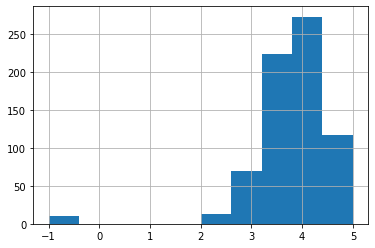

In [10]:
# Summarizing companies based on their rating
df.Rating.hist()

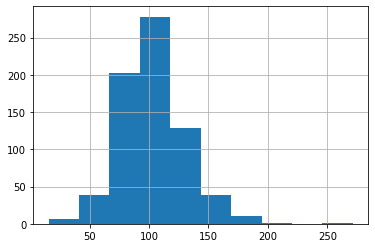

In [11]:
# Summarizing companies based on the average salary
df.avg_salary.hist()

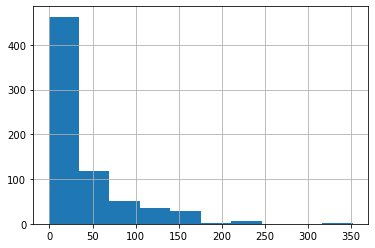

In [12]:
# Summarizing companies based on their age
df.age.hist()

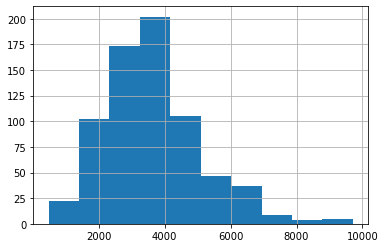

In [13]:
# Summarizing companies based on the job description lengths
df.desc_len.hist()

*Creating boxplots to visually evaluate the descriptions of maximums, minimums, median values, first quarter values, and third quarter values of the data.*

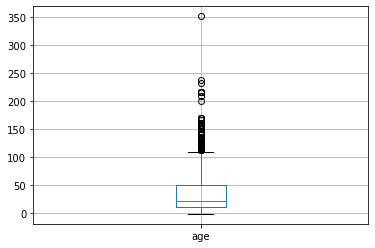

In [14]:
# Describing companies based on their age
df.boxplot(column = ['age'])

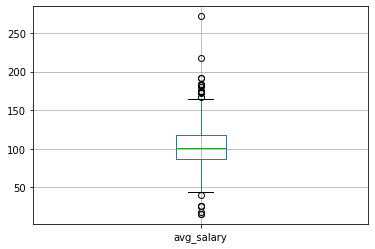

In [15]:
# Describing companies based on the average salary
df.boxplot(column = ['avg_salary'])

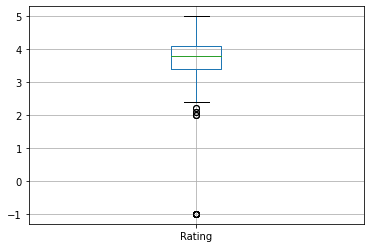

In [16]:
# Describing companies based on their ratings
df.boxplot(column = ['Rating'])

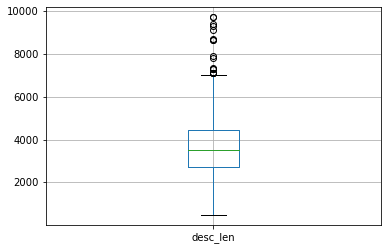

In [17]:
# Describing companies based on the job description lengths
df.boxplot(column = ['desc_len'])

*Finding a correlation between each of the categories and plotting them on a heatmap for visual analysis.*

In [18]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.056733,0.082998,0.185145
avg_salary,-0.056733,1.000000,0.018314,0.069384
Rating,0.082998,0.018314,1.000000,-0.019876
desc_len,0.185145,0.069384,-0.019876,1.000000


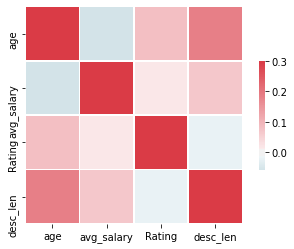

In [19]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

*Creating bar graphs to visually analyze the similarities between categories.*

In [20]:
df_cat1 = df[['Size', 'Type of ownership', 'Sector', 'Revenue', 'job_state', 'job_simple', 'seniority']]
df_cat2 = df[['Location', 'company_txt', 'Industry']]
df_cat3 = df[['python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn',
       'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn',
       'sql_yn', 'matlab_yn', 'julia_yn']]

graph for Size: total = 8


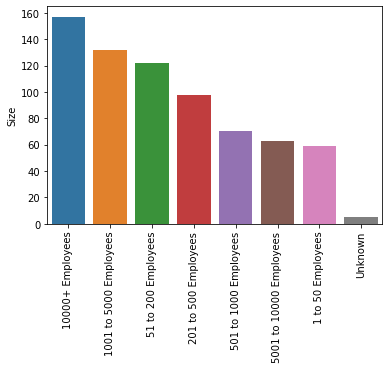

graph for Type of ownership: total = 10


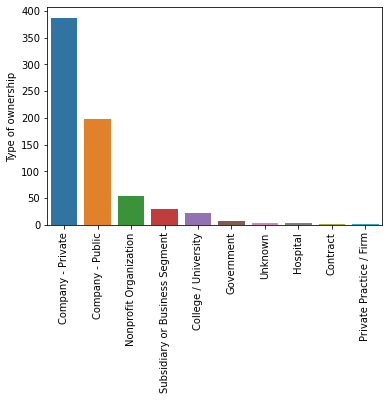

graph for Sector: total = 24


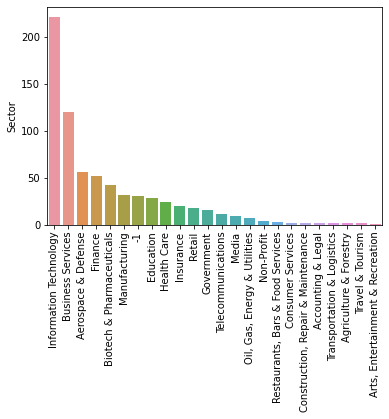

graph for Revenue: total = 13


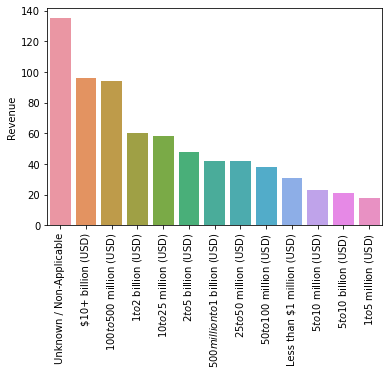

graph for job_state: total = 37


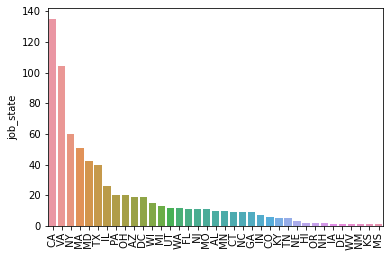

graph for job_simple: total = 7


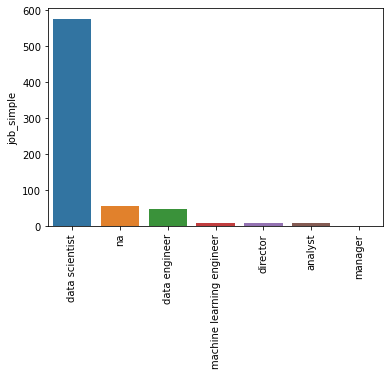

graph for seniority: total = 3


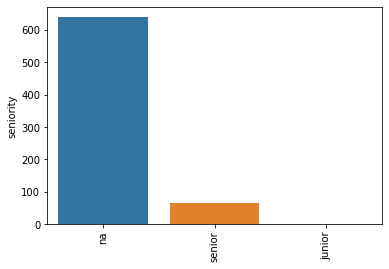

In [21]:
for i in df_cat1.columns:
    cat_num = df_cat1[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


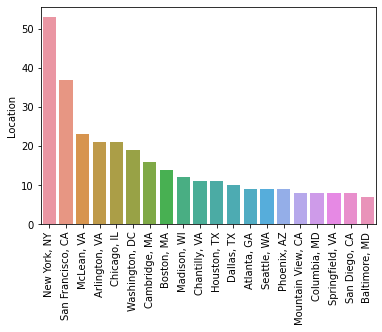

graph for company_txt: total = 20


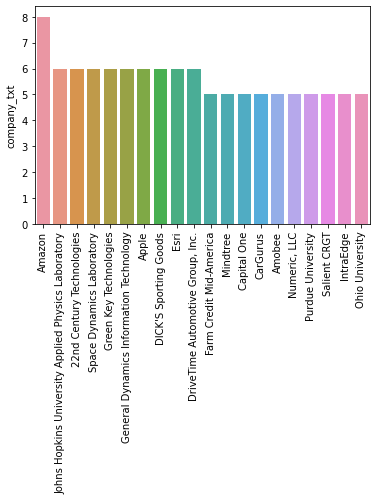

graph for Industry: total = 20


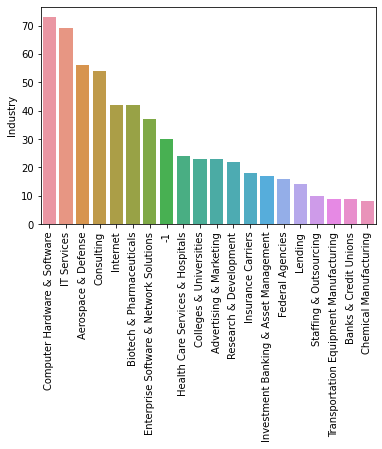

In [22]:
for i in df_cat2.columns:
    cat_num = df_cat2[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for python_yn: total = 2


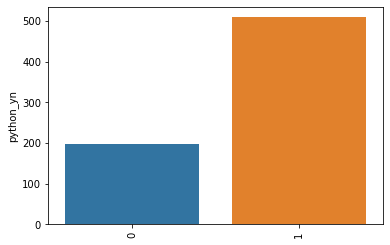

graph for rstudio_yn: total = 2


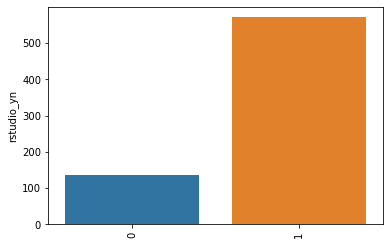

graph for spark_yn: total = 2


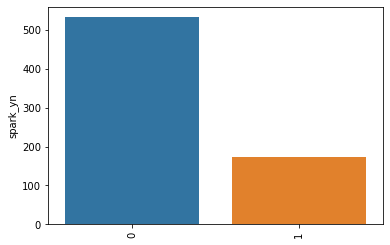

graph for aws_yn: total = 2


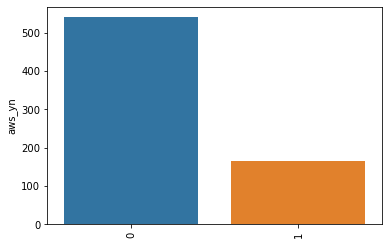

graph for excel_yn: total = 2


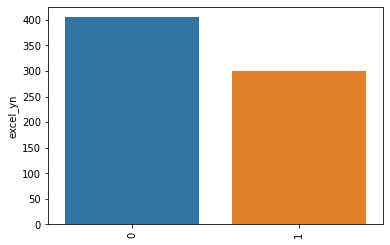

graph for java_yn: total = 2


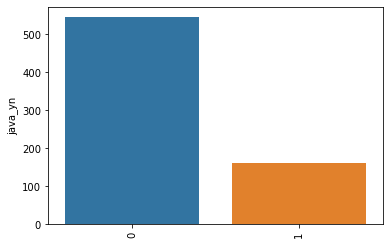

graph for swift_yn: total = 2


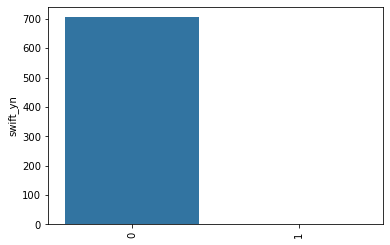

graph for scala_yn: total = 2


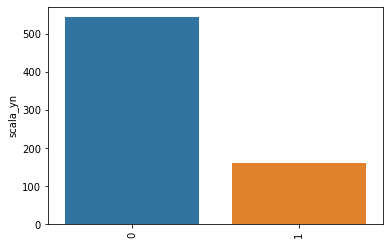

graph for go_yn: total = 2


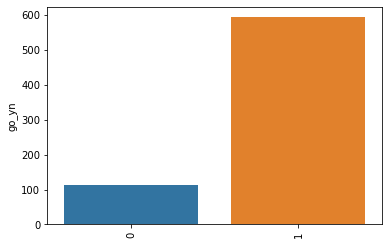

graph for elm_yn: total = 1


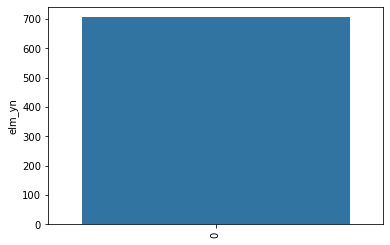

graph for ruby_yn: total = 2


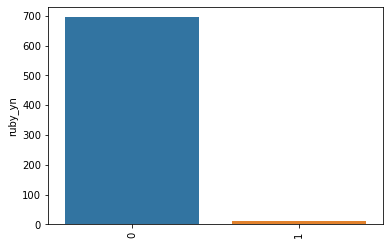

graph for csharp_yn: total = 2


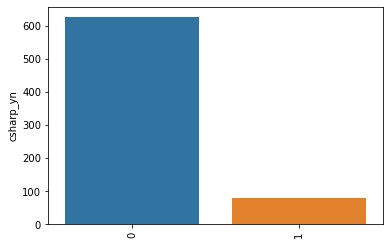

graph for rust_yn: total = 2


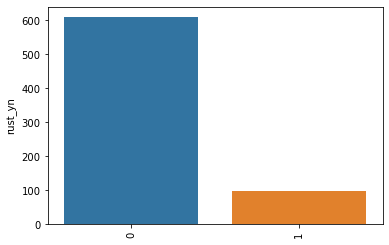

graph for sql_yn: total = 2


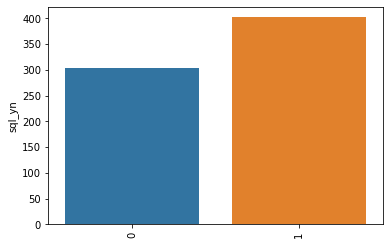

graph for matlab_yn: total = 2


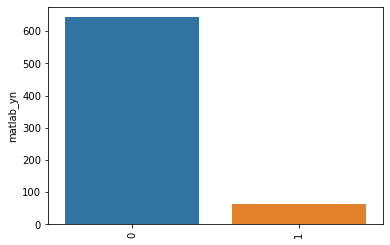

graph for julia_yn: total = 2


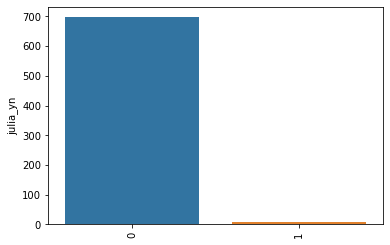

In [23]:
for i in df_cat3.columns:
    cat_num = df_cat3[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

*Creating pivot tables to see the average salary based on job titles and seniority levels.*

In [24]:
# Finding average salary for types of jobs
pd.pivot_table(df, index = 'job_simple', values = 'avg_salary')

,avg_salary
job_simple,
analyst,87.571429
data engineer,107.458333
data scientist,105.955729
director,94.000000
machine learning engineer,115.277778
manager,172.000000
na,78.678571


In [25]:
# Finding average salary for types of jobs with seniority values
pd.pivot_table(df, index = ['job_simple', 'seniority'], values = 'avg_salary')

avg_salary
job_simple                seniority            
analyst                   na          73.900000
                          senior     121.750000
data engineer             na         101.441176
                          senior     122.071429
data scientist            junior      60.000000
                          na         103.522346
                          senior     141.552632
director                  na          94.000000
machine learning engineer na         115.277778
manager                   na         172.000000
na                        na          75.988889
                          senior      89.681818

In [26]:
pd.set_option('display.max_rows', None)

In [27]:
# Finding number of jobs based on state
pd.pivot_table(df, index = ['job_state', 'job_simple'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = True)

avg_salary
job_state job_simple                           
 AL       data scientist                      9
          na                                  1
 AZ       data scientist                     13
          director                            6
 CA       manager                             1
          machine learning engineer           3
          na                                  5
          data engineer                       7
          analyst                             2
          data scientist                    117
 CO       data engineer                       2
          data scientist                      4
 CT       data engineer                       1
          data scientist                      7
          na                                  1
 DC       data scientist                     19
 DE       data scientist                      1
 FL       data scientist                      9
          na                                  2
 GA       data scientist                      6
          data engineer                       3
 HI       data scientist                      2
 IA       data engineer                       1
 IL       analyst                             2
          data engineer                       1
          data scientist                     22
          na                                  1
 IN       data scientist                      7
 KS       data scientist                      1
 KY       data scientist                      5
 MA       na                                 10
          machine learning engineer           2
          data engineer                       5
          data scientist                     33
          director                            1
 MD       data scientist                     37
          data engineer                       5
 MI       director                            1
          na                                  4
          data engineer                       1
          data scientist                      7
 MN       director                            1
          data engineer                       2
          data scientist                      7
 MO       data engineer                       1
          data scientist                     10
 MS       na                                  1
 NC       data scientist                      5
          na                                  4
 NE       data scientist                      3
 NH       data scientist                      2
 NJ       na                                  1
          data scientist                      8
          analyst                             1
          data engineer                       1
 NM       na                                  1
 NY       data engineer                       3
          data scientist                     55
          na                                  2
 OH       analyst                             1
          data scientist                     15
          na                                  4
 OR       data scientist                      2
 PA       data scientist                     18
          data engineer                       2
 TN       data scientist                      4
          na                                  1
 TX       data engineer                       3
          data scientist                     30
          machine learning engineer           3
          na                                  4
 UT       data engineer                       1
          data scientist                      5
          na                                  6
 VA       data engineer                       8
          data scientist                     92
          na                                  4
 WA       data scientist                     11
          machine learning engineer           1
 WI       data scientist                      9
          na                                  4
          analyst                             1
     

In [28]:
# Finding average salary by state
pd.pivot_table(df[df.job_simple == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,126.649573
KY,114.500000
OR,112.000000
MA,111.757576
KS,111.000000
WA,109.409091
TN,109.000000
NY,106.900000
MD,105.391892


In [29]:
# Finding average salary based on company ratings
df_pivots = df[['Rating', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'java_yn', 'swift_yn', 'scala_yn', 'go_yn', 'elm_yn', 'ruby_yn', 'csharp_yn', 'rust_yn', 'sql_yn', 'matlab_yn', 'julia_yn', 'avg_salary']]

In [30]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.1    151.500000
 2.0    140.000000
 3.6    126.553571
 2.5    120.300000
 4.7    116.636364
 4.9    114.785714
 4.6    112.578947
 4.1    108.697368
 3.9    108.507246
 2.4    108.500000
 4.0    107.042553
 5.0    106.090909
 3.0    105.333333
 3.7    105.136364
-1.0    104.450000
 4.4    103.316667
 2.2    102.750000
 3.8    101.392405
 2.8     99.700000
 3.5     99.159091
 2.9     99.045455
 3.1     98.375000
 4.3     98.333333
 3.3     97.706897
 3.4     97.693878
 4.5     96.233333
 4.2     95.772727
 4.8     95.000000
 3.2     94.933333
 2.7     91.666667
 2.6     91.083333
Type of ownership
                                avg_salary
Type of ownership                         
Hospital                        132.166667
Private Practice / Firm         115.500000
Subsidiary or Business Segment  111.931034
Company - Public                111.434010
Nonprofit Organization          101.915094
Company - Private               100.978036
Gove

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
# Companies by revenue that want python based on increase in average salary
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

*Creating a word cloud to visually observe the words in each job description*

In [31]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

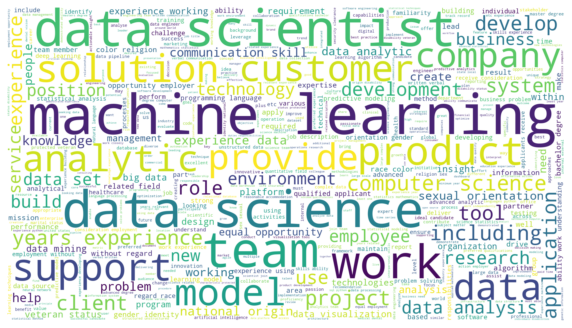

In [32]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 500, width =1920, height = 1080)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
df.to_csv('eda_data.csv')